In [25]:
%matplotlib inline

import urllib3
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
http = urllib3.PoolManager()
r = http.request('GET', 'http://192.168.0.151/api/v1/printer/diagnostics/temperature_flow/3000')
r.data

b'[["Time", "temperature0", "target0", "heater0", "flow_sensor0", "flow_steps0", "temperature1", "target1", "heater1", "flow_sensor1", "flow_steps1", "bed_temperature", "bed_target", "bed_heater", "active_hotend_or_state"], [13904.7265625, 24.5, 0.0, 0.0, 0.0, 0.0, 24.799999237060547, 0.0, 0.0, 0.0, 0.0, 19.700000762939453, 0.0, 0.0, 10.0], [13904.8505859375, 24.5, 0.0, 0.0, 0.0, 0.0, 24.799999237060547, 0.0, 0.0, 0.0, 0.0, 19.600000381469727, 0.0, 0.0, 10.0], [13904.9755859375, 24.5, 0.0, 0.0, 0.0, 0.0, 24.799999237060547, 0.0, 0.0, 0.0, 0.0, 20.100000381469727, 0.0, 0.0, 10.0], [13905.0947265625, 24.5, 0.0, 0.0, 0.0, 0.0, 24.799999237060547, 0.0, 0.0, 0.0, 0.0, 19.899999618530273, 0.0, 0.0, 10.0], [13905.2119140625, 24.5, 0.0, 0.0, 0.0, 0.0, 24.799999237060547, 0.0, 0.0, 0.0, 0.0, 19.5, 0.0, 0.0, 10.0], [13905.333984375, 24.5, 0.0, 0.0, 0.0, 0.0, 24.799999237060547, 0.0, 0.0, 0.0, 0.0, 19.700000762939453, 0.0, 0.0, 10.0], [13905.4462890625, 24.5, 0.0, 0.0, 0.0, 0.0, 24.79999923706054

In [27]:
diagnostics = pd.read_json(r.data)
diagnostics.rename(columns={c:diagnostics.at[0,c] for c in diagnostics}, inplace=True)
diagnostics.drop(diagnostics.head(1).index, inplace=True)

In [28]:
diagnostics.head()

,Time,temperature0,target0,heater0,flow_sensor0,flow_steps0,temperature1,target1,heater1,flow_sensor1,flow_steps1,bed_temperature,bed_target,bed_heater,active_hotend_or_state
1,13904.7,24.5,0,0,0,0,24.8,0,0,0,0,19.7,0,0,10
2,13904.9,24.5,0,0,0,0,24.8,0,0,0,0,19.6,0,0,10
3,13905,24.5,0,0,0,0,24.8,0,0,0,0,20.1,0,0,10
4,13905.1,24.5,0,0,0,0,24.8,0,0,0,0,19.9,0,0,10
5,13905.2,24.5,0,0,0,0,24.8,0,0,0,0,19.5,0,0,10


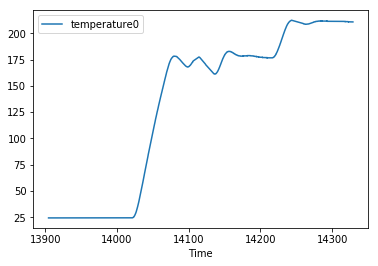

In [29]:
plt.figure()
diagnostics.plot(x='Time', y='temperature0')